## Part 6: Data Visualization

**Create meaningful visualizations for the following:**

**V1. Bar chart showing the top 10 authors by number of books written**

In [1]:
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# 
USER ='postgres'
PASSWORD = 'kanyisola'
HOST = 'localhost'
PORT = '5432'
DB = 'library_db'

# Create database connection
engine = create_engine(f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}')

# Load all the database
books = pd.read_sql("SELECT * FROM Books", engine)
authors = pd.read_sql("SELECT * FROM Authors", engine)
book_orders = pd.read_sql("SELECT * FROM BookOrders", engine)
borrow_history = pd.read_sql("SELECT * FROM Borrowedhistory", engine)
members = pd.read_sql("SELECT * FROM Members", engine)
library_staff = pd.read_sql("SELECT * FROM LibraryStaff", engine)
departments = pd.read_sql("SELECT * FROM Departments", engine)

# Display the book_orders
book_orders.head(5)

,order_id,order_date,book_id,cost,quantity,supply_date,fulfillment_status,supplier_name
0,1,2024-01-10,1,12.99,5,2024-01-18,fulfilled,Baker & Taylor
1,2,2024-01-15,22,15.95,8,2024-01-25,fulfilled,Ingram Book Group
2,3,2024-02-05,30,8.99,10,2024-02-15,fulfilled,Scholastic
3,4,2024-02-12,7,14.50,6,2024-02-22,fulfilled,Random House
4,5,2024-02-20,19,13.75,4,2024-03-02,fulfilled,HarperCollins


In [2]:
# Top ten authors by the number of books written
author_by_books = authors.groupby('author_name')['number_of_books_written'].sum().sort_values(ascending=False).head(10)
author_by_books

author_name
Isaac Asimov         500
Agatha Christie       85
Stephen King          64
Philip K. Dick        44
Terry Pratchett       41
Neil Gaiman           35
Arthur C. Clarke      33
Paulo Coelho          30
Brandon Sanderson     28
Ray Bradbury          27
Name: number_of_books_written, dtype: int64

<Axes: title={'center': 'Top 10 authors by the number of books written'}, xlabel='Authors', ylabel='Number_of_books_written'>

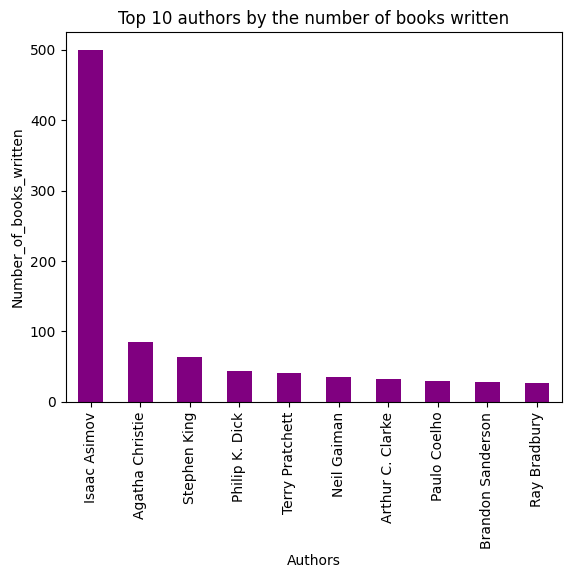

In [3]:
# Plotting the top 10 authors by number of books written
author_by_books.plot(kind='bar', xlabel='Authors', ylabel='Number_of_books_written', title='Top 10 authors by the number of books written', color='purple')

**V2. Pie chart displaying the distribution of members by membership type**

In [4]:
# Display members columns
members.columns

Index(['membership_id', 'member_name', 'gender', 'email_address',
       'phone_number', 'age', 'type_of_membership', 'date_of_membership',
       'status', 'address'],
      dtype='object')

In [5]:
# Checking the type of membership
membership_type = members['type_of_membership'].value_counts().sort_values(ascending=True)
membership_type

type_of_membership
student     12
premium     23
standard    40
Name: count, dtype: int64

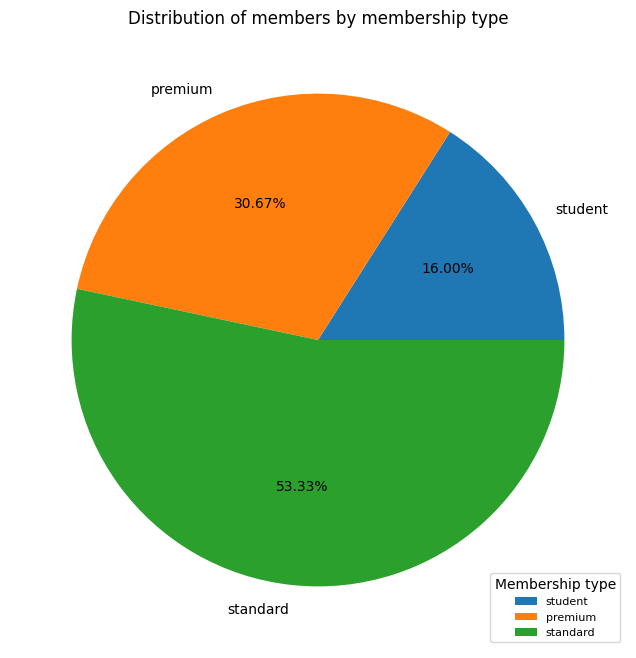

In [6]:
# Plotting the distribution of members by their membership type
plt.figure(figsize=(12,8))
plt.pie(membership_type.values, labels=membership_type.index, autopct='%1.2f%%')
plt.title('Distribution of members by membership type')
plt.legend(title='Membership type', loc='lower right', fontsize=8)
plt.show()

**V3. Line graph showing monthly borrowing trends over time**

In [7]:
# Merge the borrow_history and books by the primary key
books_borrowed = pd.merge(books, borrow_history, on='book_id', how='inner')
books_borrowed.head(2)

,book_id,title,authors_id,genre,date_of_publication,publisher,isbn,language,available_copies,age_rating,borrowed_id,membership_id,borrow_date,return_date
0,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,1,1,2024-01-15,2024-02-05
1,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,55,50,2024-03-22,None


In [8]:
# convert the borrow_date to datetime format
books_borrowed['borrow_date'] = pd.to_datetime(books_borrowed['borrow_date'])

# Extract the year and month from the date
books_borrowed['borrow_year'] = books_borrowed['borrow_date'].dt.year
books_borrowed['borrow_month'] = books_borrowed['borrow_date'].dt.month_name()

In [9]:
# Monthly borrowing trends for the past year (count of books borrowed per month).
borrowed_books_trend = books_borrowed.groupby(['borrow_year', 'borrow_month']).size().reset_index(name='total_borrowed_books').sort_values(by='total_borrowed_books', ascending=True)
borrowed_books_trend

,borrow_year,borrow_month,total_borrowed_books
1,2024,January,32
0,2024,February,58
2,2024,March,60


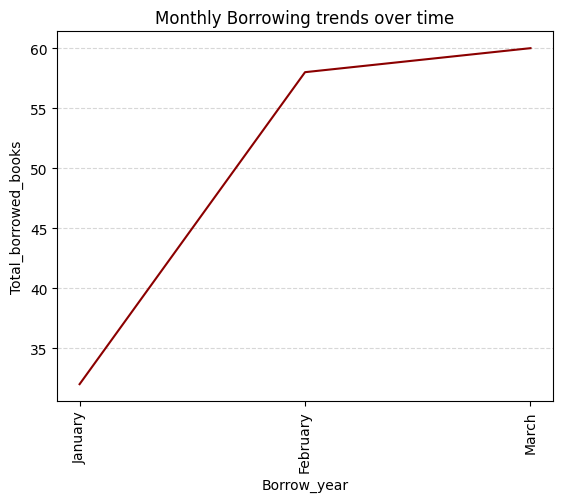

In [10]:
# Plotting the monthly borrowing trends over time using line graph in matplotlib
plt.plot(borrowed_books_trend['borrow_month'], borrowed_books_trend['total_borrowed_books'], color='darkred')
plt.xlabel('Borrow_year')
plt.ylabel('Total_borrowed_books')
plt.title('Monthly Borrowing trends over time')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**V4. Horizontal bar chart of book genres by total available copies**

In [11]:
# Print the columns in books
books.columns

Index(['book_id', 'title', 'authors_id', 'genre', 'date_of_publication',
       'publisher', 'isbn', 'language', 'available_copies', 'age_rating'],
      dtype='object')

In [12]:
# Showing the average no of available copies by genre
total_available_copies = books.groupby('genre')['available_copies'].sum().reset_index(name='total_available_copies').sort_values(by='total_available_copies', ascending=True)
total_available_copies

,genre,total_available_copies
2,Essay,1
0,Children's Literature,2
5,Historical Mystery,2
13,Post-apocalyptic,2
18,Travel,3
17,Short Stories,3
15,Science,5
14,Romance,6
1,Dystopian Fiction,6
8,Magical Realism,7


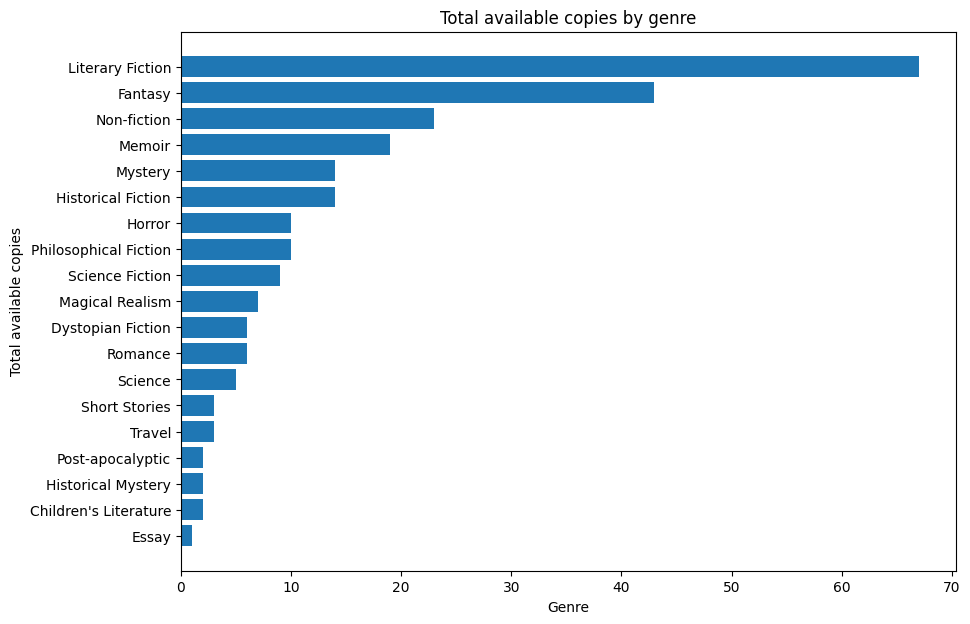

In [13]:
# Plotting the chart for the Total available copies by genre using horizontal bar chat in matplotlib
plt.figure(figsize=(10,7))
plt.barh(total_available_copies['genre'], total_available_copies['total_available_copies'].values)
plt.xlabel('Genre')
plt.ylabel('Total available copies')
plt.title('Total available copies by genre')
plt.xticks(rotation = 0)
plt.show()

**V5. Heatmap or stacked bar chart showing book orders by fulfillment status and supplier**

In [14]:
# Display the columns in book_orders
book_orders.columns

Index(['order_id', 'order_date', 'book_id', 'cost', 'quantity', 'supply_date',
       'fulfillment_status', 'supplier_name'],
      dtype='object')

In [15]:
# View the table
book_orders.head(2)

,order_id,order_date,book_id,cost,quantity,supply_date,fulfillment_status,supplier_name
0,1,2024-01-10,1,12.99,5,2024-01-18,fulfilled,Baker & Taylor
1,2,2024-01-15,22,15.95,8,2024-01-25,fulfilled,Ingram Book Group


In [16]:
# Group the fulfillment status by the supplier's name
book_orders_status = book_orders.groupby(['fulfillment_status', 'supplier_name']).size().reset_index(name='book_order_count').sort_values(by='book_order_count', ascending=False)
book_orders_status

,fulfillment_status,supplier_name,book_order_count
25,fulfilled,Knopf,6
27,fulfilled,Little Brown,4
4,fulfilled,Bloomsbury,4
13,fulfilled,Doubleday,3
33,fulfilled,Rocco,3
28,fulfilled,McClelland & Stewart,2
11,fulfilled,Crown,2
15,fulfilled,Europa Editions,2
31,fulfilled,Random House,2
41,pending,Collins Crime Club,2


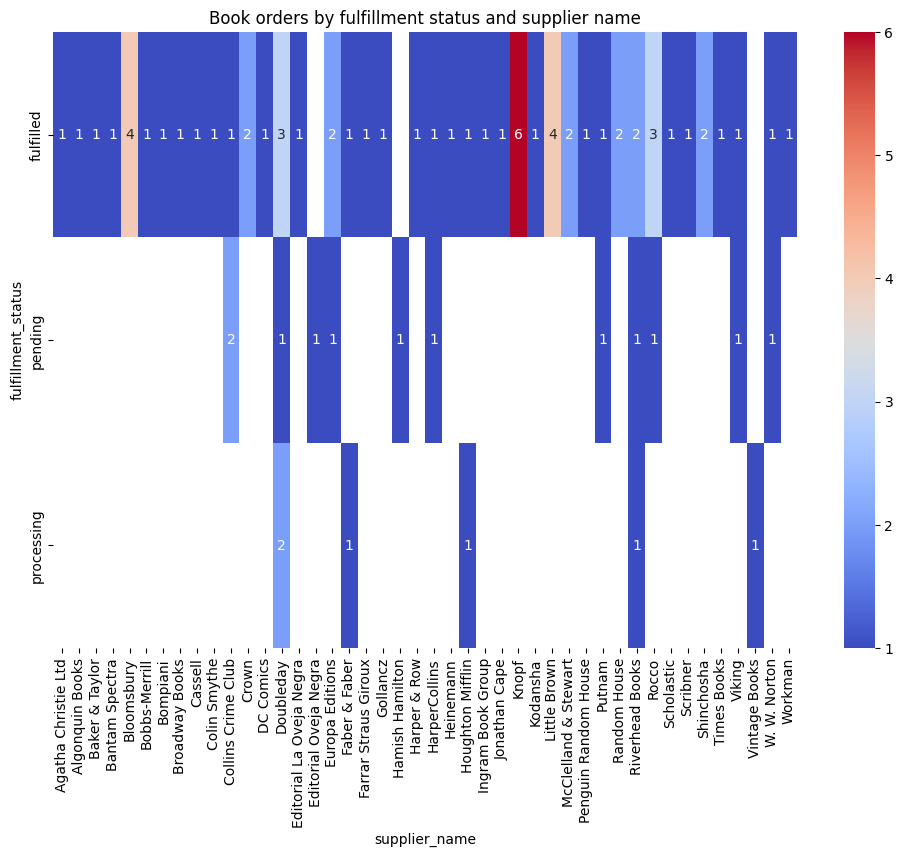

In [17]:
# Plot the correlation matrix as a heatmap
group_book_orders = book_orders_status.pivot(index='fulfillment_status', columns='supplier_name', values='book_order_count')

plt.figure(figsize=(12, 8))
sns.heatmap(group_book_orders, annot=True, cmap='coolwarm')
plt.title('Book orders by fulfillment status and supplier name')
plt.show()